# IMDB Bollywood Movies Prediction

In [99]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

## LOADING AND UNDERSTANDING  DATASET

In [90]:
mvs=pd.read_csv('IMDb_india.csv', encoding='latin1')

In [91]:
mvs.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [92]:
mvs.shape

(15509, 10)

In [93]:
mvs.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [17]:
mvs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


## Data Preprocessing

In [18]:
mvs.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [20]:
mvs.isnull().sum(axis=1).sort_values(ascending=False)

1920     9
1836     9
3807     9
8669     9
9600     9
        ..
7385     0
7383     0
7380     0
7377     0
15508    0
Length: 15509, dtype: int64

In [21]:
mvs.drop(['Actor 2', 'Actor 3'], axis=1, inplace=True)

In [22]:
mvs[mvs['Name'] == 'A Ballad of Maladies']

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
135,A Ballad of Maladies,(2016),86 min,"Documentary, Music",NaN,NaN,Sarvnik Kaur,Tushar Madhav
136,A Ballad of Maladies,(2016),86 min,"Documentary, History, Music",NaN,NaN,Sarvnik Kaur,Tushar Madhav


In [23]:
mvs.dropna(subset=['Duration'],inplace=True)

In [101]:
mvs = mvs[(mvs.isnull().sum(axis=1).sort_values(ascending=False) <= 5)]

In [26]:
mvs.dropna(subset=['Rating','Votes'],inplace=True)

In [27]:
mvs.isnull().sum()

Name         0
Year         0
Duration     0
Genre       31
Rating       0
Votes        0
Director     1
Actor 1     75
dtype: int64

In [29]:
mvs.Director.describe()

count             5850
unique            2549
top       David Dhawan
freq                41
Name: Director, dtype: object

In [30]:
mvs.groupby('Director').Director.count().sort_values(ascending=False)

Director
David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         34
Shakti Samanta          34
Hrishikesh Mukherjee    33
                        ..
Kathir                   1
Kashmira Shah            1
Kashinath                1
Kasam Ali                1
Zunaid Memon             1
Name: Director, Length: 2549, dtype: int64

In [31]:
mvs['Director'].fillna('David Dhawan',inplace=True)

In [32]:
mvs['Genre'].fillna('Drama',inplace=True)

In [33]:
mvs['Actor 1'].fillna('Amitabh Bachchan', inplace=True)

In [34]:
mvs.isnull().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
dtype: int64

In [40]:
mvs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5851 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   int32  
 2   Duration  5851 non-null   int32  
 3   Genre     5851 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   object 
 6   Director  5851 non-null   object 
 7   Actor 1   5851 non-null   object 
dtypes: float64(1), int32(2), object(5)
memory usage: 365.7+ KB


### Exploratory Data Analysis  & Visualization

In [56]:
mvs['Votes'] = mvs['Votes'].astype(str)
mvs['Votes'] = mvs['Votes'].str.replace(',','')

In [53]:
mvs['Year'] = mvs['Year'].replace(r'[()]', '', regex=True)
mvs['Duration'] = mvs['Duration'].replace(r' min', '', regex=True)

In [57]:
mvs

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave
...,...,...,...,...,...,...,...,...
15493,Zubaan,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal
15494,Zubeidaa,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor
15503,Zulm Ki Zanjeer,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi
15505,Zulmi,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar


In [59]:
mvs['Year'] = mvs['Year'].astype('int')
mvs['Duration'] =mvs['Duration'].astype('int')
mvs['Votes'] = mvs['Votes'].astype('int')

In [60]:
mvs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5851 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5851 non-null   object 
 1   Year      5851 non-null   int32  
 2   Duration  5851 non-null   int32  
 3   Genre     5851 non-null   object 
 4   Rating    5851 non-null   float64
 5   Votes     5851 non-null   int32  
 6   Director  5851 non-null   object 
 7   Actor 1   5851 non-null   object 
dtypes: float64(1), int32(3), object(4)
memory usage: 342.8+ KB


In [61]:
mvs.describe()

,Year,Duration,Rating,Votes
count,5851.000000,5851.000000,5851.000000,5851.000000
mean,1996.416852,132.294480,5.931875,2611.273116
std,19.914640,26.555826,1.389942,13433.828528
min,1931.000000,21.000000,1.100000,5.000000
25%,1983.000000,117.000000,5.000000,28.000000
50%,2002.000000,134.000000,6.100000,119.000000
75%,2013.000000,150.000000,7.000000,862.500000
max,2021.000000,321.000000,10.000000,591417.000000


Text(0.5, 1.0, 'Number of Movies Per Year')

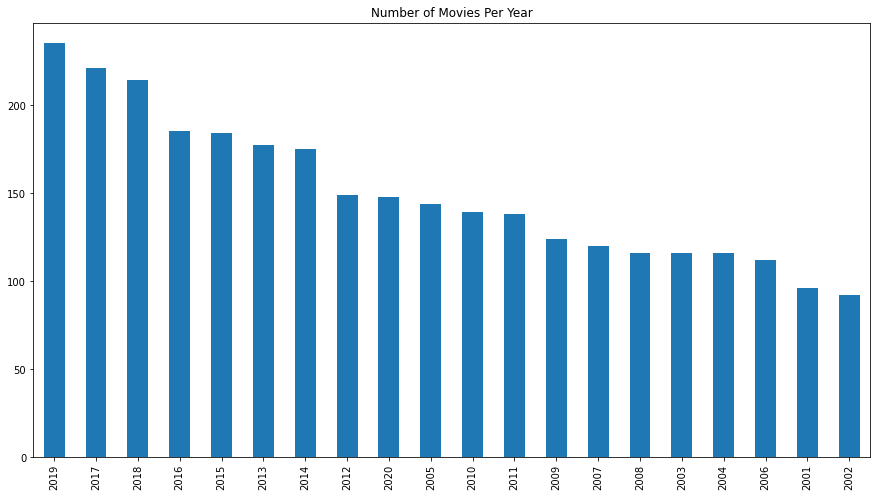

In [66]:
plt.figure(figsize=(15,8))
mvs['Year'].value_counts().head(20).plot(kind='bar')
plt.title('Number of Movies Per Year')

Text(0.5, 1.0, 'Actor with Many Movies')

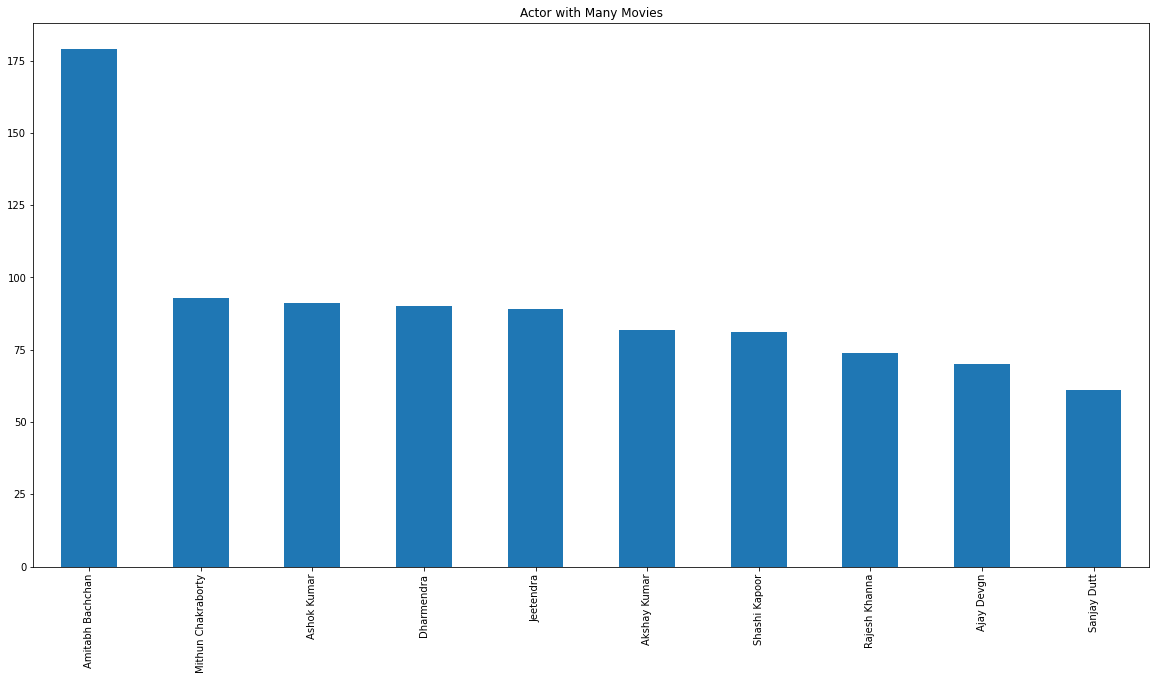

In [64]:
plt.figure(figsize=(20,10))
mvs['Actor 1'].value_counts().sort_values(ascending = False).head(10).plot(kind='bar')
plt.title('Actor with Many Movies')

Text(0.5, 1.0, 'Director with Many Movies')

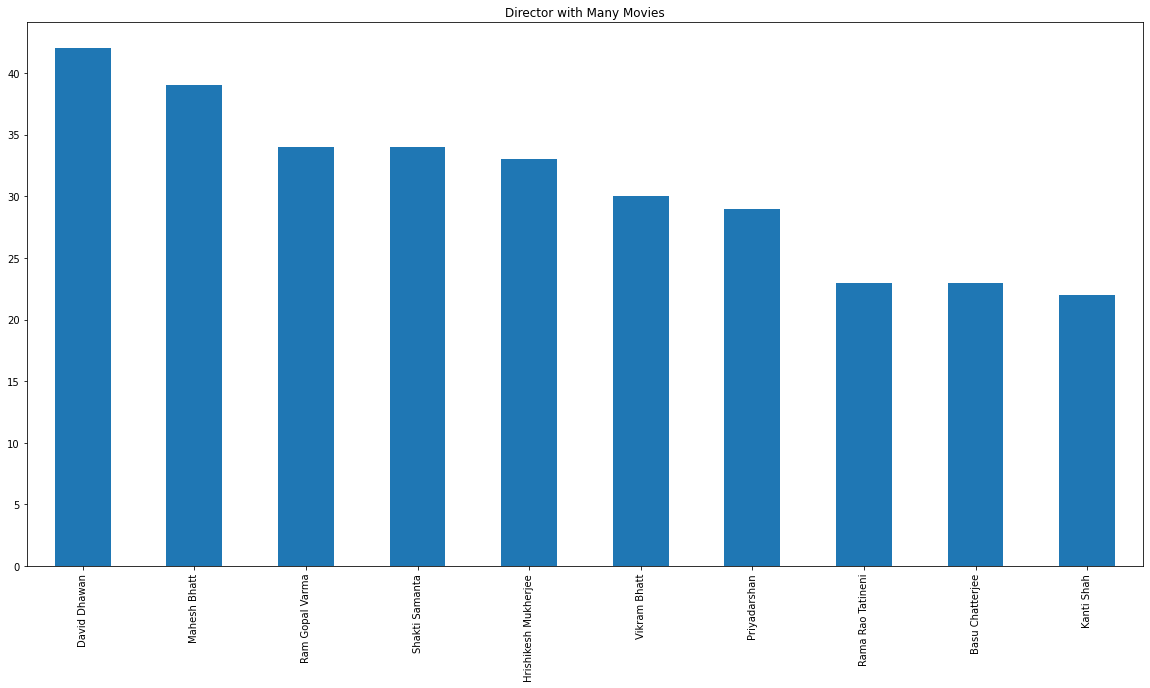

In [67]:
plt.figure(figsize=(20,10))
mvs['Director'].value_counts().sort_values(ascending = False).head(10).plot(kind='bar')
plt.title('Director with Many Movies')

<AxesSubplot:>

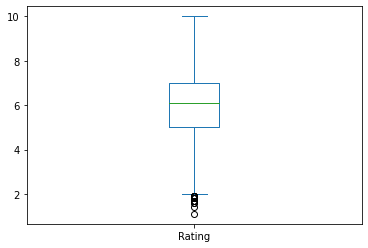

In [68]:
mvs['Rating'].plot(kind='box')

<AxesSubplot:xlabel='Year', ylabel='Rating'>

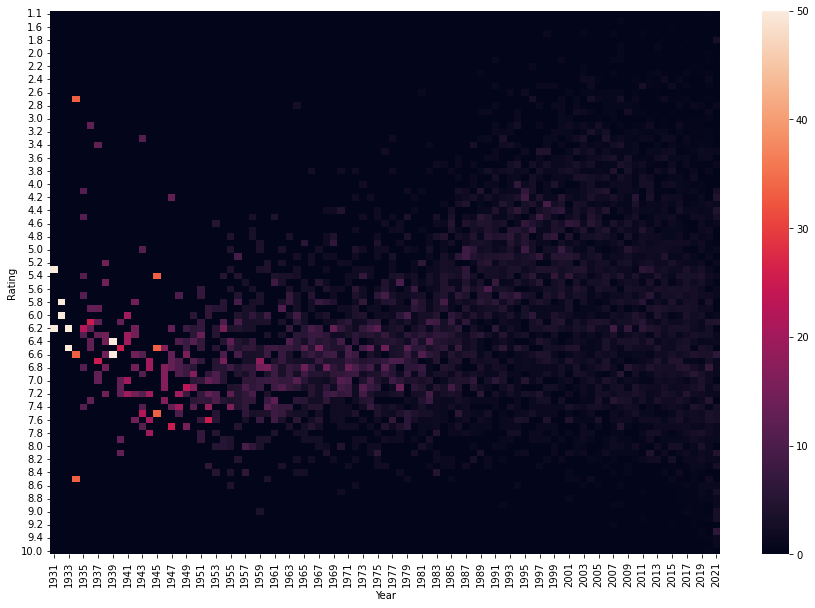

In [69]:
plt.figure(figsize=(15,10))
sns.heatmap(pd.crosstab(mvs['Rating'], mvs['Year'], normalize='columns') * 100)

<AxesSubplot:xlabel='Genre', ylabel='Rating'>

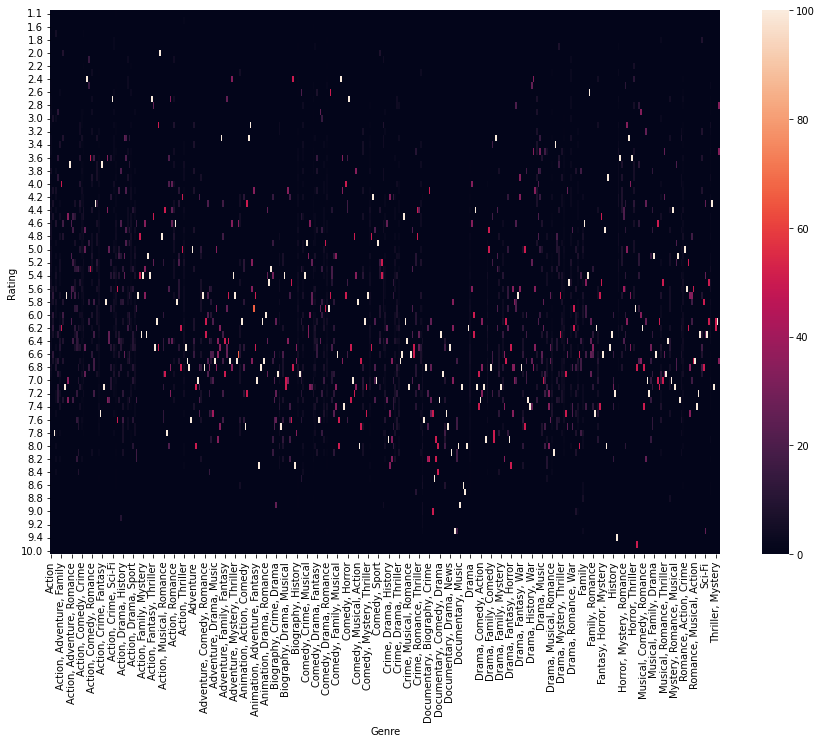

In [70]:
plt.figure(figsize=(15,10))
sns.heatmap(pd.crosstab(mvs['Rating'], mvs['Genre'], normalize='columns') * 100)

<AxesSubplot:xlabel='Duration', ylabel='Rating'>

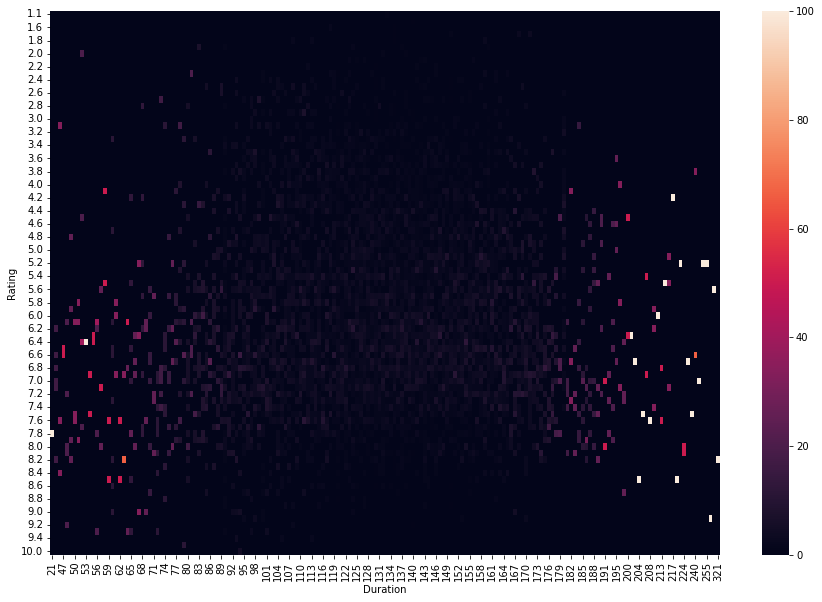

In [71]:
plt.figure(figsize=(15,10))
sns.heatmap(pd.crosstab(mvs['Rating'], mvs['Duration'], normalize='columns') * 100)

#  model building - Linear Regression

In [72]:
genre_counts = mvs['Genre'].value_counts()
mvs['Genre_encoded'] = mvs['Genre'].map(genre_counts)

In [73]:
genre_mean_rating = mvs.groupby('Genre')['Rating'].transform('mean')
mvs['Genre_mean_rating'] = genre_mean_rating

In [74]:
director_mean_rating = mvs.groupby('Director')['Rating'].transform('mean')
mvs['Director_encoded'] = director_mean_rating

In [75]:
actor_mean_rating = mvs.groupby('Actor 1')['Rating'].transform('mean')
mvs['Actor_encoded'] = actor_mean_rating

<AxesSubplot:ylabel='Frequency'>

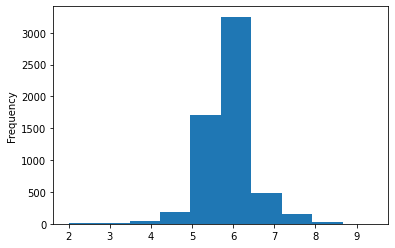

In [76]:
mvs['Genre_mean_rating'].plot(kind='hist')

In [87]:
# here I applied many encoding techniques but my root mean square error was 1.33 then I decrease to o.71
# which is sufficient

X = mvs[[ 'Year', 'Votes', 'Duration','Genre_mean_rating','Director_encoded','Actor_encoded']]
y = mvs['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 0.7176648127562956


In [79]:
X = mvs[[ 'Year', 'Votes', 'Duration','Genre_mean_rating','Director_encoded','Actor_encoded']]
y = mvs['Rating']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print('Mean squared error: ',mean_squared_error(y_test,y_pred))
print('Mean absolute error: ',mean_absolute_error(y_test,y_pred))
print('R2 score: ',r2_score(y_test,y_pred))cfrby

Mean squared error:  0.5150427834685287
Mean absolute error:  0.5126362245791549
R2 score:  0.7231721423658712


In [82]:
from sklearn.linear_model import LinearRegression
import pandas as pd
model = LinearRegression()
X, y = mvs[['Year', 'Votes', 'Duration','Genre_mean_rating','Director_encoded','Actor_encoded']], mvs.Rating
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
# display adjusted R-squared
1 - (1-model.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1)

0.7297990760090838